## Workshop 4-Coin-Detection-using-OpenCV-in-Python
## Name: Ramkumar G
## Reg No: 212223220084

Total coins detected: 8


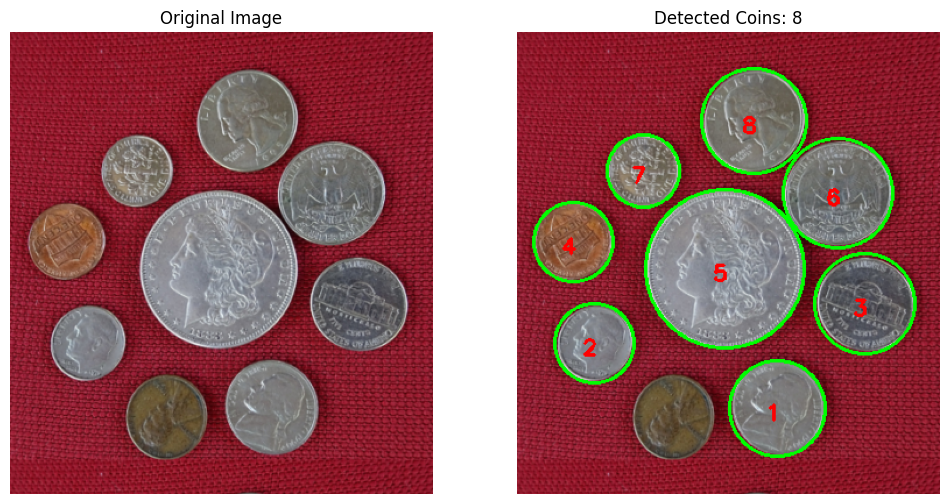

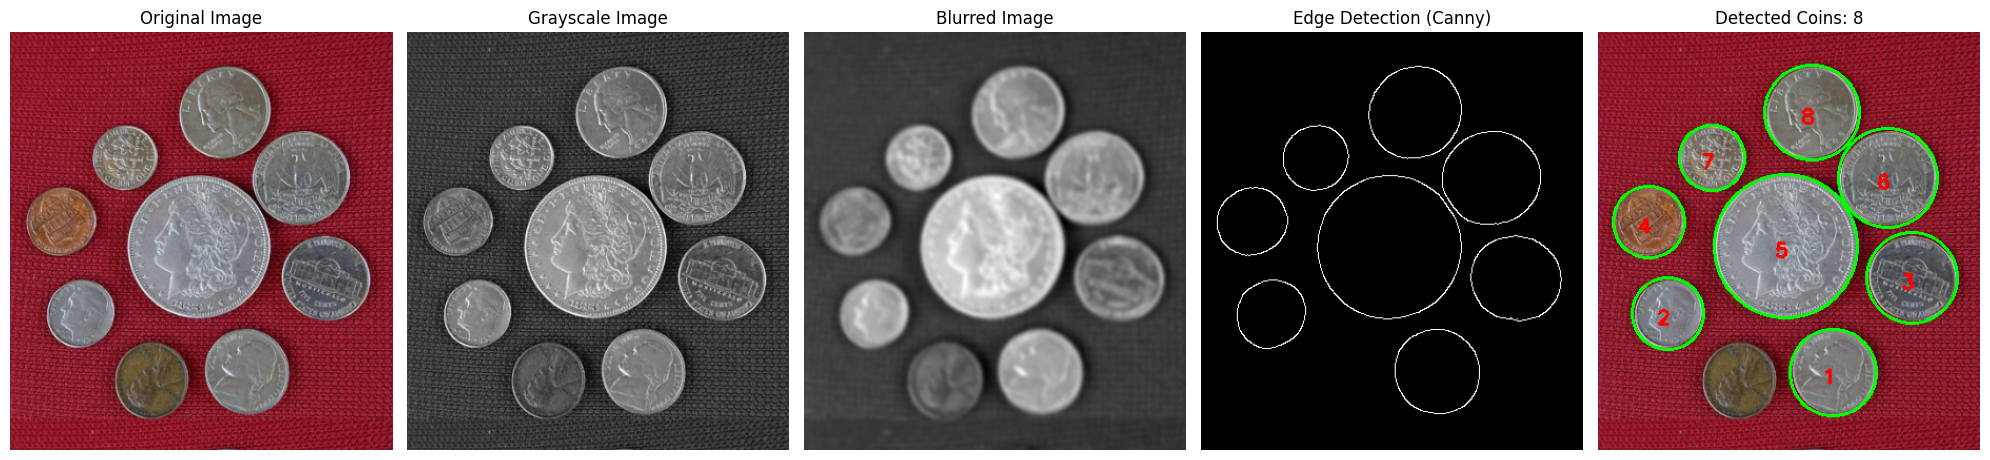

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# --- 1. Load Image ---
image_path = "coin.png"  # make sure 'coin.jpg' is in your working directory
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# --- 2. Convert to Grayscale ---
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# --- 3. Apply Gaussian Blur ---
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

# --- 4. Edge Detection using Canny ---
edges = cv2.Canny(blurred, 30, 150)

# --- 5. Find Contours ---
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# --- 6. Copy Image for Drawing ---
output = image.copy()
coin_count = 0

# --- 7. Loop through contours to detect coins ---
for contour in contours:
    area = cv2.contourArea(contour)
    if area < 300:   # ignore small areas (noise)
        continue

    ((x, y), radius) = cv2.minEnclosingCircle(contour)
    if radius > 15:  # only count as coin if circle is big enough
        coin_count += 1
        cv2.circle(output, (int(x), int(y)), int(radius), (0, 255, 0), 2)
        cv2.putText(output, f"{coin_count}", (int(x - 10), int(y + 10)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

# --- 8. Print total detected coins ---
print(f"Total coins detected: {coin_count}")

# --- 9. Display Original and Detected Coins ---
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Detected Coins: {coin_count}")
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# --- 10. Show Step-by-Step Process ---
fig, axs = plt.subplots(1, 5, figsize=(20, 6))

axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(gray, cmap='gray')
axs[1].set_title("Grayscale Image")
axs[1].axis("off")

axs[2].imshow(blurred, cmap='gray')
axs[2].set_title("Blurred Image")
axs[2].axis("off")

axs[3].imshow(edges, cmap='gray')
axs[3].set_title("Edge Detection (Canny)")
axs[3].axis("off")

axs[4].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[4].set_title(f"Detected Coins: {coin_count}")
axs[4].axis("off")

plt.tight_layout()
plt.show()